In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics, preprocessing
from sklearn.ensemble import RandomForestClassifier

# read training data
bank_train = pd.read_csv("bank_train.csv")

# read test data
bank_test = pd.read_csv("bank_test.csv")

print(bank_train.head())
print(bank_test.head())

   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   39       156         5    999         0           1.4          94.465   
1   25       103         1    999         0           1.4          93.918   
2   50       121         2    999         0           1.1          93.994   
3   45       187         1    999         0           1.4          93.444   
4   46       124         4    999         0          -1.8          93.075   

   cons.conf.idx  euribor3m  nr.employed  ...  job  marital  education  \
0          -41.8      4.865       5228.1  ...    4        1          1   
1          -42.7      4.963       5228.1  ...    0        2          3   
2          -36.4      4.859       5191.0  ...    9        1          5   
3          -36.1      4.965       5228.1  ...    1        1          0   
4          -47.1      1.405       5099.1  ...    7        1          3   

   default  housing  loan  contact  month  day_of_week  poutcome  
0        1        0     0

In [2]:
# Build the model 
# Create a random forest object rf (use default hyperparameters)
rf = RandomForestClassifier()

In [4]:
# Train the model

# Create x_train: Drop the columns 'purchased' (target) and 'id'
# print(bank_train.columns)
x_train = bank_train.drop(['purchased','id'],axis=1)

# Create y_train
y_train = bank_train['purchased']

# Fit the model
rf.fit(x_train, y_train)

C:\Users\kumarman\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [5]:
#  Make predictions using test data
print(bank_test.head())

# remember to drop 'id' from the test dataset 
predictions = rf.predict(bank_test.drop(['id'], axis=1))
print(predictions[:5])

# Write the columns 'id' and 'predictions' into the output file
d = pd.DataFrame({'id': bank_test['id'], 'bank_predicted': predictions})

# Write the output
# d.to_csv('/code/output/bank_predictions.csv', sep=",")

   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   29       202         1    999         0           1.4          93.444   
1   38       333         1    999         0           1.4          94.465   
2   35       262         3    999         0          -1.8          92.893   
3   25       109         1    999         0           1.4          94.465   
4   44       296         1    999         0          -1.8          92.893   

   cons.conf.idx  euribor3m  nr.employed  ...  job  marital  education  \
0          -36.1      4.964       5228.1  ...    9        2          5   
1          -41.8      4.958       5228.1  ...    1        1          2   
2          -46.2      1.299       5099.1  ...    9        1          6   
3          -41.8      4.967       5228.1  ...    0        1          6   
4          -46.2      1.291       5099.1  ...    4        1          2   

   default  housing  loan  contact  month  day_of_week  poutcome  
0        0        2     2

id  bank_predicted
0     1760               0
1     1647               0
2      555               0
3      473               0
4     3031               0
5     1824               0
6     3864               1
7     3631               0
8     1951               0
9     3469               0
10    2692               0
11    2046               0
12    3390               0
13    2505               0
14    2011               0
15    3046               0
16    2130               0
17     683               0
18     422               0
19    3301               0
20    3711               0
21    2167               0
22     395               0
23     175               0
24     607               0
25    3388               0
26    2783               1
27    2974               0
28     232               0
29    2115               0
...    ...             ...
3265   402               0
3266  3374               0
3267  2280               0
3268  2854               0
3269   123               0
3270   121               0
3271  1147               0
3272  1309               0
3273  2072               0
3274  1938               0
3275  2891               0
3276  2858               1
3277  1656               0
3278   649               0
3279  1237               0
3280  2261               0
3281  2557               0
3282  2819               0
3283  2914               0
3284   726               0
3285   143               0
3286  1898               0
3287  3698               1
3288   583               1
3289  2757               0
3290  1173               0
3291  3093               0
3292  2397               0
3293   223               0
3294  4012               0

[3295 rows x 2 columns]

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics, preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# read training data
bank_train = pd.read_csv("bank_train.csv")

# read test data
bank_test = pd.read_csv("bank_test.csv")

print(bank_train.head())
print(bank_test.head())

##########################
## WRITE YOUR CODE HERE ##
##########################

# create x_train and y_train
x_train = bank_train.drop(['purchased', 'id'], axis=1)
y_train = bank_train[['purchased']]

   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   39       156         5    999         0           1.4          94.465   
1   25       103         1    999         0           1.4          93.918   
2   50       121         2    999         0           1.1          93.994   
3   45       187         1    999         0           1.4          93.444   
4   46       124         4    999         0          -1.8          93.075   

   cons.conf.idx  euribor3m  nr.employed  ...  job  marital  education  \
0          -41.8      4.865       5228.1  ...    4        1          1   
1          -42.7      4.963       5228.1  ...    0        2          3   
2          -36.4      4.859       5191.0  ...    9        1          5   
3          -36.1      4.965       5228.1  ...    1        1          0   
4          -47.1      1.405       5099.1  ...    7        1          3   

   default  housing  loan  contact  month  day_of_week  poutcome  
0        1        0     0

In [9]:
#####################################################
## Implement GridSearchCV to find optimal max_depth
#####################################################

# specify number of folds for k-fold CV
n_folds = 5

# specify range of the hyperparameter max_depth 
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", 
                   return_train_score = True)

# fit the rf model 
rf.fit(x_train, y_train)

# store scores/results of GridSearch CV in a df
scores = rf.cv_results_
pd.DataFrame(scores).head()

C:\Users\kumarman\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kumarman\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kumarman\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kumarman\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed w

C:\Users\kumarman\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kumarman\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kumarman\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kumarman\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.014401      0.004845         0.001999        0.000629   
1       0.019992      0.002083         0.002011        0.000019   
2       0.023804      0.002633         0.002602        0.000802   
3       0.023598      0.001191         0.002201        0.000400   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.899848           0.893778   
1               7   {'max_depth': 7}           0.922610           0.911988   
2              12  {'max_depth': 12}           0.925645           0.899848   
3              17  {'max_depth': 17}           0.908953           0.895296   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.898331           0.908953  ...         0.901366        0.005429   
1           0.898331           0.916540  ...         0.911684        0.008109   
2           0.895296           0.911988  ...         0.908953        0.010644   
3           0.895296           0.907436  ...         0.902883        0.006220   

   rank_test_score  split0_train_score  split1_train_score  \
0                4            0.901745            0.895296   
1                1            0.952959            0.950683   
2                2            0.982929            0.982929   
3                3            0.993171            0.991654   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.908574            0.903263            0.903642   
1            0.951442            0.936267            0.953718   
2            0.982929            0.981032            0.985964   
3            0.993551            0.990895            0.991654   

   mean_train_score  std_train_score  
0          0.902504         0.004272  
1          0.949014         0.006463  
2          0.983156         0.001584  
3          0.992185         0.001007  

[4 rows x 21 columns]

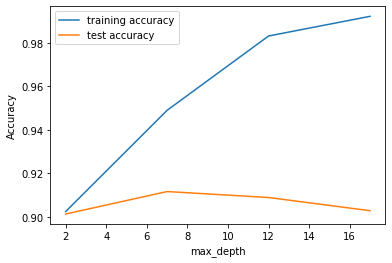

In [12]:
#####################################################
## Plot mean_train_score and mean_test_score (accuracies) on the x-axis
# and param_max_depth on the y-axis
#####################################################

plt.figure()
plt.plot(scores["param_max_depth"] , 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"] , 
         scores["mean_test_score"] , 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
# plt.savefig('/code/output/max_depth.png') 

In [14]:
# from the plot, observe the optimal value of max_depth
# and store in max_depth_optimal
max_depth_optimal = 7

#########################################
# Build the model with optimal max_depth
#########################################
rf = RandomForestClassifier(max_depth = max_depth_optimal)
rf.fit(x_train, y_train)

## Make predictions
predictions = rf.predict(bank_test.drop(['id'], axis=1))
print(predictions[:5])

# Write columns id, predictions into the output file
d = pd.DataFrame({'id': bank_test['id'], 'bank_predicted': predictions})
d
# Write the output
# d.to_csv('/code/output/bank_predictions.csv', sep=",")

[0 0 0 0 0]


C:\Users\kumarman\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kumarman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


id  bank_predicted
0     1760               0
1     1647               0
2      555               0
3      473               0
4     3031               0
5     1824               0
6     3864               1
7     3631               0
8     1951               0
9     3469               0
10    2692               0
11    2046               0
12    3390               0
13    2505               0
14    2011               0
15    3046               0
16    2130               0
17     683               0
18     422               0
19    3301               0
20    3711               0
21    2167               0
22     395               0
23     175               0
24     607               0
25    3388               0
26    2783               0
27    2974               0
28     232               0
29    2115               0
...    ...             ...
3265   402               0
3266  3374               0
3267  2280               0
3268  2854               0
3269   123               0
3270   121               0
3271  1147               0
3272  1309               0
3273  2072               0
3274  1938               0
3275  2891               0
3276  2858               1
3277  1656               0
3278   649               0
3279  1237               0
3280  2261               0
3281  2557               0
3282  2819               0
3283  2914               0
3284   726               0
3285   143               0
3286  1898               0
3287  3698               1
3288   583               0
3289  2757               0
3290  1173               0
3291  3093               0
3292  2397               0
3293   223               0
3294  4012               0

[3295 rows x 2 columns]